In [103]:
import pickle
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from cortado_core.process_tree_utils.miscellaneous import get_height, get_number_nodes

In [104]:
sns.set_theme(font="Arial", style="whitegrid", rc={"figure.figsize": (5, 4)})

folder_name = "rtfm/random_order"
folder_path = f"./results/{folder_name}"
pickle_files = [file for file in os.listdir(folder_path) if file.endswith(".pickle")]
pickle_files

['rtfm__incremental_lca_True__InitialModelMethod.TOP_1__final_00.pickle',
 'rtfm__incremental_lca_True__InitialModelMethod.TOP_1__final_01.pickle',
 'rtfm__incremental_lca_True__InitialModelMethod.TOP_1__final_02.pickle',
 'rtfm__incremental_lca_True__InitialModelMethod.TOP_1__final_03.pickle',
 'rtfm__incremental_lca_True__InitialModelMethod.TOP_1__final_04.pickle',
 'rtfm__incremental_lca_True__InitialModelMethod.TOP_1__final_05.pickle',
 'rtfm__incremental_lca_True__InitialModelMethod.TOP_1__final_06.pickle',
 'rtfm__incremental_lca_True__InitialModelMethod.TOP_1__final_07.pickle',
 'rtfm__incremental_lca_True__InitialModelMethod.TOP_1__final_08.pickle',
 'rtfm__incremental_lca_True__InitialModelMethod.TOP_1__final_09.pickle',
 'rtfm__incremental_lca_True__InitialModelMethod.TOP_1__final_10.pickle',
 'rtfm__incremental_lca_True__InitialModelMethod.TOP_1__final_11.pickle',
 'rtfm__incremental_lca_True__InitialModelMethod.TOP_1__final_12.pickle',
 'rtfm__incremental_lca_True__InitialM

In [105]:
with open(
    os.path.join(
        folder_path,
        pickle_files[0],
    ),
    "rb",
) as file:
    data = pickle.load(file)
    percentages = [100 * i / (len(data)) for i in range(len(data))]
# fitness_df = pd.DataFrame({"percentage processed variants": percentages})
# precision_df = pd.DataFrame({"percentage processed variants": percentages})
f_measure_df = pd.DataFrame({"percentage processed variants": percentages})
# height_df = pd.DataFrame({"percentage processed variants": percentages})
# nodes_df = pd.DataFrame({"percentage processed variants": percentages})

for file_name in pickle_files:
    file_path = os.path.join(folder_path, file_name)
    # if len(file_path.split("__")) == 5:
    # log_name, approach, initial_method, result_type, ending = file_path.split("__")
    if len(file_path.split("__")) == 4:
        log_name, approach, initial_method, ending = file_path.split("__")
        initial_method = initial_method.split(".")[-1]
    with open(file_path, "rb") as file:
        data = pickle.load(file)
        nan_values = [None] * (len(percentages) - len(data))
        # fitness_ds = pd.Series(
        #     nan_values + list(map(lambda iteration: iteration["fitness"], data)),
        #     name=f"{approach}__{initial_method}",
        # )
        # precision_ds = pd.Series(
        #     nan_values + list(map(lambda iteration: iteration["precision"], data)),
        #     name=f"{approach}__{initial_method}",
        # )
        f_measure_ds = pd.Series(
            nan_values + list(map(lambda iteration: iteration["f-measure"], data)),
            name=f"{approach}__{initial_method}__{ending}",
        )
        # height_ds = pd.Series(
        #     nan_values
        #     + list(
        #         map(
        #             lambda iteration: get_height(iteration["output_tree"])
        #             if iteration["output_tree"] is not None
        #             else None,
        #             data,
        #         )
        #     ),
        #     name=f"{approach}__{initial_method}",
        # )
        # nodes_ds = pd.Series(
        #     nan_values
        #     + list(
        #         map(
        #             lambda iteration: get_number_nodes(iteration["output_tree"])
        #             if iteration["output_tree"] is not None
        #             else None,
        #             data,
        #         )
        #     ),
        #     name=f"{approach}__{initial_method}",
        # )

        # fitness_df = pd.concat([fitness_df, fitness_ds], axis=1)
        # precision_df = pd.concat([precision_df, precision_ds], axis=1)
        f_measure_df = pd.concat([f_measure_df, f_measure_ds], axis=1)
        # height_df = pd.concat([height_df, height_ds], axis=1)
        # nodes_df = pd.concat([nodes_df, nodes_ds], axis=1)

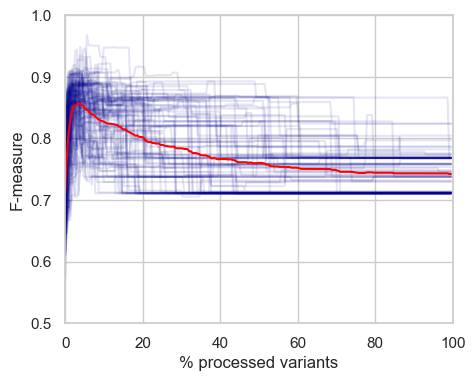

In [106]:
for col in f_measure_df.drop("percentage processed variants", axis=1).columns:
    sns.lineplot(
        f_measure_df,
        x="percentage processed variants",
        y=col,
        dashes=False,
        alpha=0.1,
        color="darkblue",
    )
average = f_measure_df.drop("percentage processed variants", axis=1).mean(axis=1)
sns.lineplot(x=percentages, y=average, color="red")
plt.xlabel("% processed variants")
plt.ylabel("F-measure")
plt.xlim(0, 100)
plt.ylim(0.5, 1)
plt.savefig(folder_path + "/random_order_f_measure_rtfn.pdf", bbox_inches="tight")
plt.savefig(folder_path + "/random_order_f_measure_rtfm.png", bbox_inches="tight")